In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
import torch.nn.functional as F
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle
import pdb

from utils import *

# Jester Data

In [8]:
CH = 23
device = torch.device('cuda')
val_dates = ['171020','180712']
test_dates = ['180711','171022']
bad_dates = ['180326', '180328', '171019', '180715', '180716', '180717']
#load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/'
load_path = '/home/bijanadmin/Desktop/Goose_and_Jester_data/data_Jester_all_10s_2/'
# save_path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_2_upsample'
save_path = '/home/bijanadmin/Desktop/Goose_and_Jester_data/data_Jester_all_10s_2/Jester_ANN_models'
model_name = 'MLP_all_ch_Drop_03'

train_files, val_files, test_files = create_files(load_path, val_dates, test_dates, bad_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files, load_path, batch_size=128, CH = CH)

In [9]:
len(train_loader), len(val_loader), len(test_loader)

(96, 21, 22)

In [10]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([128, 1, 100, 10])
torch.Size([128, 1])
128
128
128


date:180714, rec:004, time:2819.0, label:1.0
date:180714, rec:005, time:420.0, label:1.0
date:180714, rec:006, time:7116.0, label:0.0


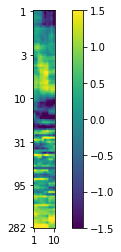

date:180714, rec:005, time:6708.0, label:0.0


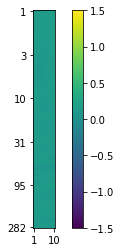

date:171023, rec:007, time:4746.0, label:0.0


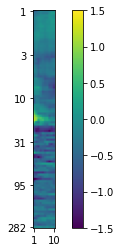

date:180713, rec:001, time:6862.0, label:0.0


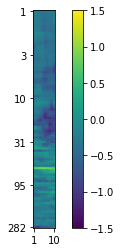

date:180713, rec:001, time:2198.0, label:0.0


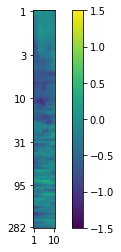

date:180713, rec:001, time:6862.0, label:0.0


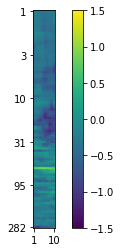

date:180714, rec:006, time:3324.0, label:0.0


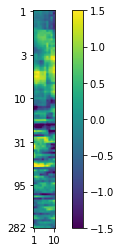

date:180713, rec:001, time:520.0, label:0.0


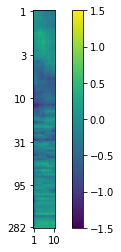

date:180713, rec:001, time:2938.0, label:0.0


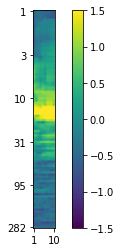

date:180713, rec:001, time:3448.0, label:0.0


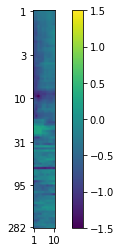

date:171023, rec:005, time:2920.0, label:1.0
date:180713, rec:001, time:830.0, label:0.0


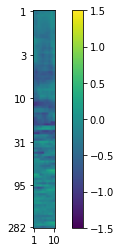

date:171021, rec:004, time:1718.0, label:1.0
date:180713, rec:008, time:4129.0, label:1.0
date:171023, rec:006, time:760.0, label:1.0
date:180713, rec:001, time:3058.0, label:0.0


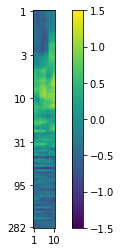

date:180713, rec:007, time:4117.0, label:1.0
date:180713, rec:009, time:6085.0, label:0.0


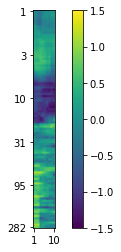

date:180713, rec:001, time:3048.0, label:0.0


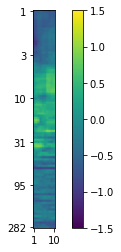

date:180713, rec:009, time:5925.0, label:0.0


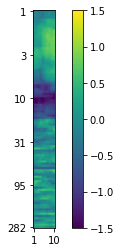

date:180713, rec:007, time:2336.0, label:1.0
date:180713, rec:001, time:6109.0, label:0.0


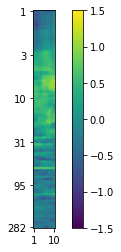

date:180714, rec:005, time:440.0, label:1.0
date:180713, rec:001, time:3198.0, label:0.0


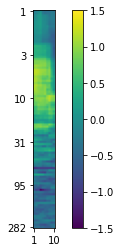

date:171021, rec:001, time:2109.0, label:0.0


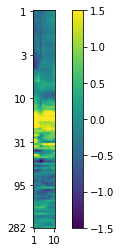

date:171021, rec:006, time:3218.0, label:1.0
date:171021, rec:001, time:2329.0, label:0.0


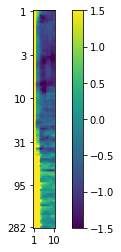

date:180713, rec:001, time:3388.0, label:0.0


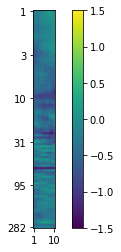

date:180713, rec:001, time:530.0, label:0.0


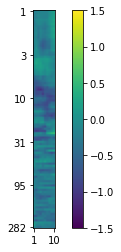

date:171023, rec:005, time:3500.0, label:1.0
date:180714, rec:006, time:6566.0, label:0.0


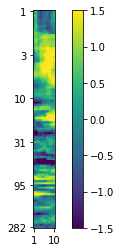

date:180713, rec:008, time:4159.0, label:1.0
date:180713, rec:001, time:650.0, label:0.0


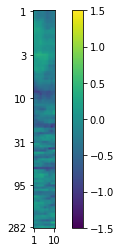

date:180713, rec:008, time:4369.0, label:1.0
date:180713, rec:002, time:2478.0, label:1.0
date:180713, rec:009, time:968.0, label:1.0
date:180714, rec:006, time:7006.0, label:0.0


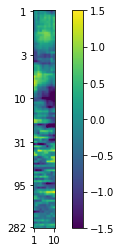

date:171023, rec:007, time:6083.0, label:0.0


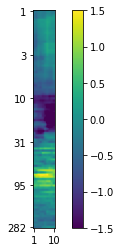

date:180713, rec:001, time:3038.0, label:0.0


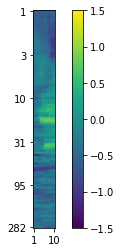

date:180713, rec:001, time:2508.0, label:0.0


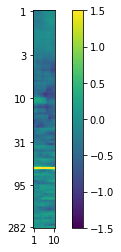

date:171023, rec:003, time:1454.0, label:1.0
date:180713, rec:009, time:6025.0, label:0.0


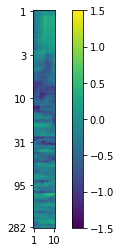

date:180713, rec:002, time:477.0, label:0.0


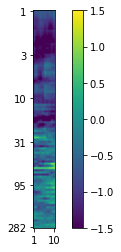

date:180713, rec:009, time:110.0, label:1.0
date:171023, rec:007, time:5687.0, label:0.0


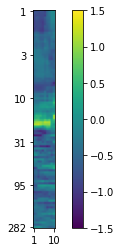

date:180714, rec:005, time:4695.0, label:1.0
date:180713, rec:009, time:3775.0, label:1.0
date:171023, rec:004, time:6223.0, label:1.0
date:171021, rec:006, time:2435.0, label:1.0
date:180714, rec:005, time:6688.0, label:0.0


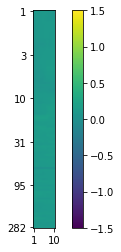

date:180713, rec:006, time:1051.0, label:1.0
date:180713, rec:001, time:5232.0, label:0.0


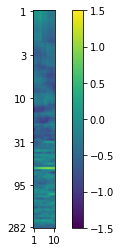

date:180714, rec:006, time:3264.0, label:0.0


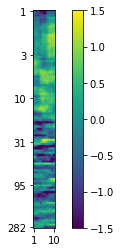

date:171021, rec:006, time:502.0, label:0.0


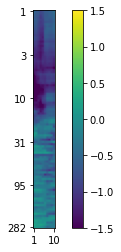

date:180713, rec:009, time:2516.0, label:1.0
date:180713, rec:001, time:720.0, label:0.0


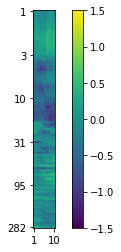

date:180714, rec:005, time:290.0, label:1.0
date:171023, rec:007, time:5517.0, label:0.0


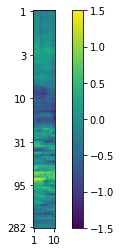

date:180713, rec:001, time:1240.0, label:0.0


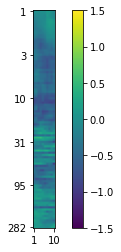

date:180713, rec:001, time:2978.0, label:0.0


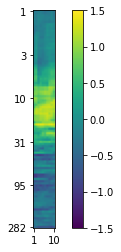

date:171023, rec:003, time:1746.0, label:1.0
date:171021, rec:006, time:1645.0, label:1.0
date:171023, rec:007, time:2823.0, label:0.0


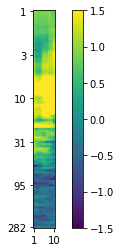

date:180714, rec:006, time:7086.0, label:0.0


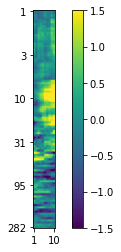

date:180714, rec:006, time:3816.0, label:1.0
date:180714, rec:006, time:3334.0, label:0.0


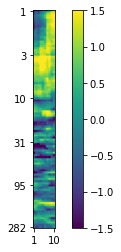

date:171023, rec:007, time:5567.0, label:0.0


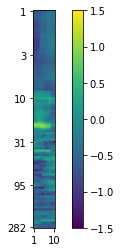

date:171021, rec:006, time:532.0, label:0.0


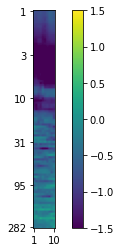

date:180713, rec:006, time:2824.0, label:1.0
date:180713, rec:001, time:3828.0, label:0.0


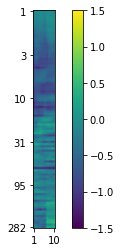

date:180713, rec:001, time:3768.0, label:0.0


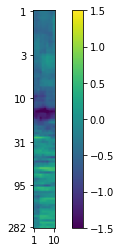

date:171023, rec:005, time:5600.0, label:1.0
date:180713, rec:009, time:6355.0, label:0.0


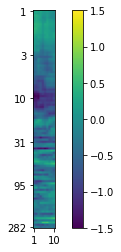

date:171023, rec:005, time:360.0, label:1.0
date:180713, rec:001, time:3278.0, label:0.0


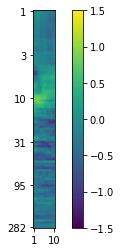

date:180713, rec:009, time:2410.0, label:1.0
date:180714, rec:005, time:5110.0, label:1.0
date:180713, rec:006, time:3912.0, label:1.0
date:180713, rec:001, time:6340.0, label:1.0
date:171021, rec:004, time:5073.0, label:1.0
date:180713, rec:008, time:5746.0, label:1.0
date:171023, rec:005, time:850.0, label:1.0
date:180714, rec:005, time:520.0, label:1.0
date:180713, rec:001, time:1210.0, label:0.0


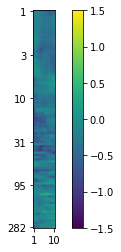

date:180713, rec:001, time:970.0, label:0.0


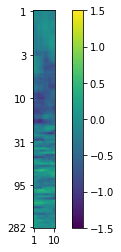

date:180713, rec:001, time:5212.0, label:0.0


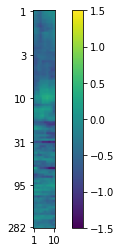

date:180713, rec:009, time:6315.0, label:0.0


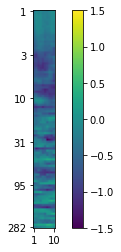

date:180713, rec:001, time:610.0, label:0.0


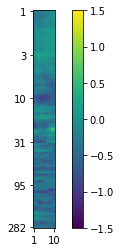

date:180713, rec:009, time:3906.0, label:1.0
date:180714, rec:005, time:5810.0, label:1.0
date:171021, rec:001, time:4764.0, label:1.0
date:180713, rec:006, time:4022.0, label:1.0
date:171023, rec:007, time:2633.0, label:0.0


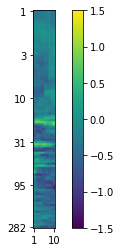

date:180713, rec:009, time:2981.0, label:1.0
date:171023, rec:003, time:3239.0, label:0.0


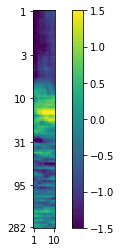

date:171023, rec:007, time:6693.0, label:0.0


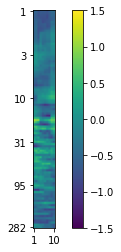

date:171023, rec:007, time:6603.0, label:0.0


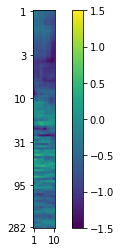

date:171023, rec:006, time:2854.0, label:0.0


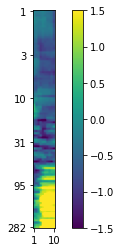

date:171023, rec:004, time:5993.0, label:1.0
date:180714, rec:005, time:5820.0, label:1.0
date:180713, rec:001, time:6712.0, label:0.0


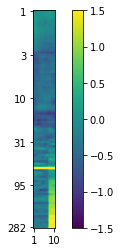

date:171021, rec:001, time:2129.0, label:0.0


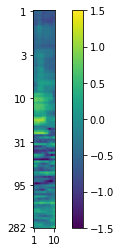

date:171021, rec:004, time:2524.0, label:1.0
date:171021, rec:004, time:3444.0, label:1.0
date:180713, rec:001, time:5911.0, label:1.0
date:171021, rec:001, time:7018.0, label:1.0
date:171021, rec:001, time:4396.0, label:1.0
date:171021, rec:004, time:3404.0, label:1.0
date:171023, rec:007, time:3982.0, label:0.0


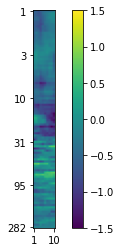

date:171023, rec:007, time:1266.0, label:0.0


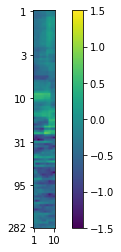

date:180714, rec:005, time:6738.0, label:0.0


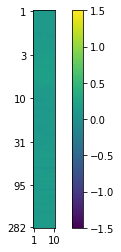

date:180713, rec:001, time:6712.0, label:0.0


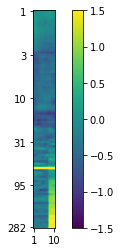

date:171023, rec:007, time:2743.0, label:0.0


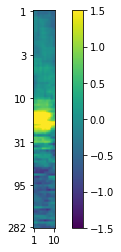

date:180713, rec:001, time:1130.0, label:0.0


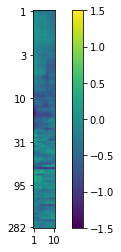

date:171023, rec:007, time:5537.0, label:0.0


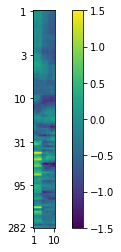

date:180713, rec:008, time:5149.0, label:1.0
date:171023, rec:003, time:2326.0, label:1.0
date:180713, rec:002, time:860.0, label:1.0
date:180714, rec:006, time:2280.0, label:1.0
date:180713, rec:009, time:998.0, label:1.0
date:180714, rec:005, time:1753.0, label:0.0


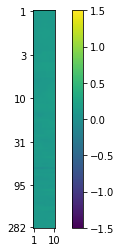

date:171021, rec:001, time:3177.0, label:1.0
date:180713, rec:002, time:7180.0, label:1.0
date:171023, rec:004, time:7142.0, label:1.0
date:180713, rec:008, time:980.0, label:1.0
date:171021, rec:006, time:2878.0, label:1.0


In [11]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}, label:{}'.format(date[i], rec[i], time[i], label[i][0].numpy()))
        if label[i][0].numpy() == 0.0:
            data_sub = data[i][0]
            plt.yticks(ticks=[0, 20, 40, 60, 80, 99], labels=[round(np.logspace(0, 2.45, 100)[i]) for i in [0, 20, 40, 60, 80, 99]])
            plt.xticks(ticks=[0, 9], labels=[1, 10])
            plt.imshow(data_sub)
            plt.clim(-1.5, 1.5)
            plt.colorbar()
            plt.show()
    break

In [12]:
class MLP(nn.Module): # add dropo
    def __init__(self, input_dim=100*10*62, output_dim=1, embed_dim=256,drop_prob=0.):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(input_dim, embed_dim)
        self.linear2 = nn.Linear(embed_dim, output_dim)
        self.dropout = nn.Dropout(drop_prob)
        
    def forward(self, x):
        
        x = x.reshape([x.shape[0], 1, -1]).float()
        x = self.dropout(F.relu(self.linear1(x)))
        outputs = self.linear2(x)
        
        return outputs

In [13]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0
model_type = 'MLP'
loss_type = 'bce'
reg_type = 'none'
input_dim = 1*10*100
embed_dim = 256
dropout_all = [0,0.1,0.3,0.5,0.7,0.9,1]




dropout:  0
Train loss for epoch 0: 0.39733797311782837
Val loss for epoch 0: 0.5411140322685242
Train loss for epoch 1: 0.2657124400138855
Val loss for epoch 1: 0.5750371217727661
Train loss for epoch 2: 0.20255205035209656
Val loss for epoch 2: 0.550989031791687
Train loss for epoch 3: 0.15854224562644958
Val loss for epoch 3: 0.5289962887763977
3
Train loss for epoch 4: 0.12770098447799683
Val loss for epoch 4: 0.6082552671432495
Train loss for epoch 5: 0.1152782142162323
Val loss for epoch 5: 0.6546109318733215
Train loss for epoch 6: 0.09686083346605301
Val loss for epoch 6: 0.67690509557724
Train loss for epoch 7: 0.0754457637667656
Val loss for epoch 7: 0.6822214126586914
Train loss for epoch 8: 0.06910032778978348
Val loss for epoch 8: 0.7103555202484131
Train loss for epoch 9: 0.060925859957933426
Val loss for epoch 9: 0.7392623424530029
Train loss for epoch 10: 0.05489819869399071
Val loss for epoch 10: 0.8147059679031372
Train loss for epoch 11: 0.05251332372426987
Val loss 

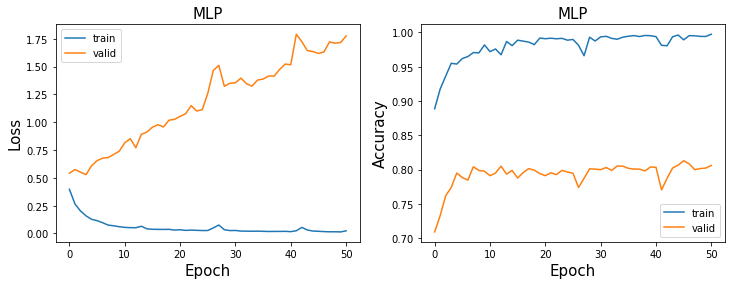

dropout:  0.1
Train loss for epoch 0: 0.4006521701812744
Val loss for epoch 0: 0.601294755935669
Train loss for epoch 1: 0.27680298686027527
Val loss for epoch 1: 0.5363644957542419
1
Train loss for epoch 2: 0.21347877383232117
Val loss for epoch 2: 0.491917222738266
2
Train loss for epoch 3: 0.1740221232175827
Val loss for epoch 3: 0.5061370730400085
Train loss for epoch 4: 0.14490367472171783
Val loss for epoch 4: 0.6020941138267517
Train loss for epoch 5: 0.12637479603290558
Val loss for epoch 5: 0.6744609475135803
Train loss for epoch 6: 0.10503672063350677
Val loss for epoch 6: 0.5952672362327576
Train loss for epoch 7: 0.0970832034945488
Val loss for epoch 7: 0.6800383925437927
Train loss for epoch 8: 0.08223138004541397
Val loss for epoch 8: 0.7061838507652283
Train loss for epoch 9: 0.07102809846401215
Val loss for epoch 9: 0.7416491508483887
Train loss for epoch 10: 0.06806878000497818
Val loss for epoch 10: 0.7616042494773865
Train loss for epoch 11: 0.06332314014434814
Val l

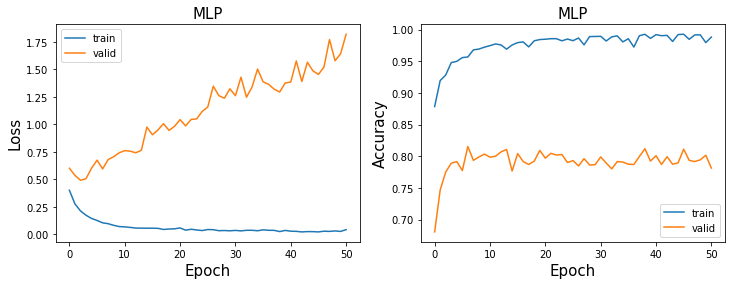

dropout:  0.3
Train loss for epoch 0: 0.4021013081073761
Val loss for epoch 0: 0.5654774308204651
Train loss for epoch 1: 0.29085472226142883
Val loss for epoch 1: 0.5483450889587402
1
Train loss for epoch 2: 0.23334451019763947
Val loss for epoch 2: 0.5155611038208008
2
Train loss for epoch 3: 0.197061687707901
Val loss for epoch 3: 0.5415223836898804
Train loss for epoch 4: 0.16683697700500488
Val loss for epoch 4: 0.5315083265304565
Train loss for epoch 5: 0.15744398534297943
Val loss for epoch 5: 0.5525789260864258
Train loss for epoch 6: 0.13512200117111206
Val loss for epoch 6: 0.6842528581619263
Train loss for epoch 7: 0.1225949376821518
Val loss for epoch 7: 0.6590918898582458
Train loss for epoch 8: 0.11227598786354065
Val loss for epoch 8: 0.6732872128486633
Train loss for epoch 9: 0.10260631144046783
Val loss for epoch 9: 0.6718124151229858
Train loss for epoch 10: 0.0977003276348114
Val loss for epoch 10: 0.7310183048248291
Train loss for epoch 11: 0.09217720478773117
Val l

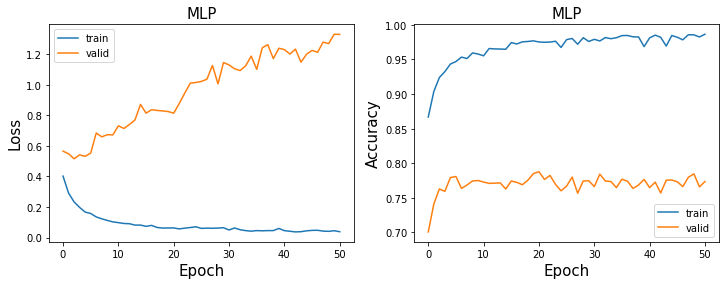

dropout:  0.5
Train loss for epoch 0: 0.4234800636768341
Val loss for epoch 0: 0.5613335371017456
Train loss for epoch 1: 0.3195638954639435
Val loss for epoch 1: 0.49020832777023315
1
Train loss for epoch 2: 0.27214139699935913
Val loss for epoch 2: 0.5397464632987976
Train loss for epoch 3: 0.24146172404289246
Val loss for epoch 3: 0.5278609395027161
Train loss for epoch 4: 0.21584607660770416
Val loss for epoch 4: 0.5010568499565125
Train loss for epoch 5: 0.20648549497127533
Val loss for epoch 5: 0.5336786508560181
Train loss for epoch 6: 0.17919477820396423
Val loss for epoch 6: 0.520695149898529
Train loss for epoch 7: 0.1644677072763443
Val loss for epoch 7: 0.5552876591682434
Train loss for epoch 8: 0.15432454645633698
Val loss for epoch 8: 0.5804004073143005
Train loss for epoch 9: 0.14994235336780548
Val loss for epoch 9: 0.6613827347755432
Train loss for epoch 10: 0.14476196467876434
Val loss for epoch 10: 0.6544155478477478
Train loss for epoch 11: 0.1336129903793335
Val lo

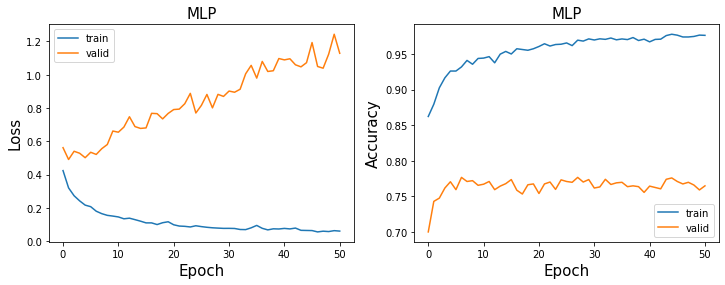

dropout:  0.7
Train loss for epoch 0: 0.4405224025249481
Val loss for epoch 0: 0.5799716711044312
Train loss for epoch 1: 0.3676851689815521
Val loss for epoch 1: 0.5423542261123657
1
Train loss for epoch 2: 0.328833669424057
Val loss for epoch 2: 0.514631450176239
2
Train loss for epoch 3: 0.2991091012954712
Val loss for epoch 3: 0.5438926815986633
Train loss for epoch 4: 0.2831912636756897
Val loss for epoch 4: 0.4921690821647644
4
Train loss for epoch 5: 0.2641232907772064
Val loss for epoch 5: 0.5821123123168945
Train loss for epoch 6: 0.255986750125885
Val loss for epoch 6: 0.5349441766738892
Train loss for epoch 7: 0.23576012253761292
Val loss for epoch 7: 0.5182281136512756
Train loss for epoch 8: 0.22640955448150635
Val loss for epoch 8: 0.5052405595779419
Train loss for epoch 9: 0.213792622089386
Val loss for epoch 9: 0.5523456931114197
Train loss for epoch 10: 0.2135516107082367
Val loss for epoch 10: 0.520363986492157
Train loss for epoch 11: 0.2030792236328125
Val loss for 

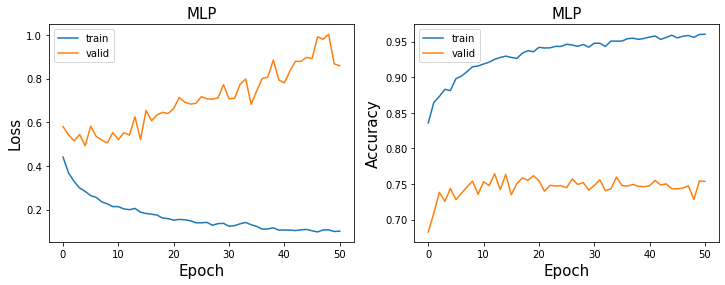

dropout:  0.9
Train loss for epoch 0: 0.5154889225959778
Val loss for epoch 0: 0.5670765042304993
Train loss for epoch 1: 0.46715208888053894
Val loss for epoch 1: 0.5351200103759766
1
Train loss for epoch 2: 0.43263083696365356
Val loss for epoch 2: 0.5600845813751221
Train loss for epoch 3: 0.41684842109680176
Val loss for epoch 3: 0.5500367283821106
Train loss for epoch 4: 0.4047123193740845
Val loss for epoch 4: 0.5449695587158203
Train loss for epoch 5: 0.3942277133464813
Val loss for epoch 5: 0.5648233890533447
Train loss for epoch 6: 0.38491472601890564
Val loss for epoch 6: 0.551824688911438
Train loss for epoch 7: 0.3697396218776703
Val loss for epoch 7: 0.5575647950172424
Train loss for epoch 8: 0.3654212951660156
Val loss for epoch 8: 0.570665180683136
Train loss for epoch 9: 0.3573667109012604
Val loss for epoch 9: 0.553963303565979
Train loss for epoch 10: 0.34991082549095154
Val loss for epoch 10: 0.5511053800582886
Train loss for epoch 11: 0.36394742131233215
Val loss fo

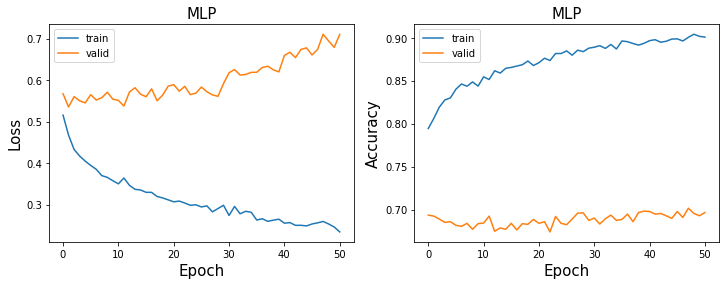

dropout:  1
Train loss for epoch 0: 0.6933693885803223
Val loss for epoch 0: 0.6890360116958618
Train loss for epoch 1: 0.6932379007339478
Val loss for epoch 1: 0.6861118078231812
1
Train loss for epoch 2: 0.6931836009025574
Val loss for epoch 2: 0.6845136284828186
2
Train loss for epoch 3: 0.6931671500205994
Val loss for epoch 3: 0.6835824847221375
3
Train loss for epoch 4: 0.6931685209274292
Val loss for epoch 4: 0.6817610263824463
4
Train loss for epoch 5: 0.6931573748588562
Val loss for epoch 5: 0.681682288646698
5
Train loss for epoch 6: 0.6931625604629517
Val loss for epoch 6: 0.6814361810684204
6
Train loss for epoch 7: 0.6931576728820801
Val loss for epoch 7: 0.681511640548706
Train loss for epoch 8: 0.6931626796722412
Val loss for epoch 8: 0.6816507577896118
Train loss for epoch 9: 0.6931652426719666
Val loss for epoch 9: 0.6822033524513245
Train loss for epoch 10: 0.6931740641593933
Val loss for epoch 10: 0.6827060580253601
Train loss for epoch 11: 0.6931575536727905
Val loss

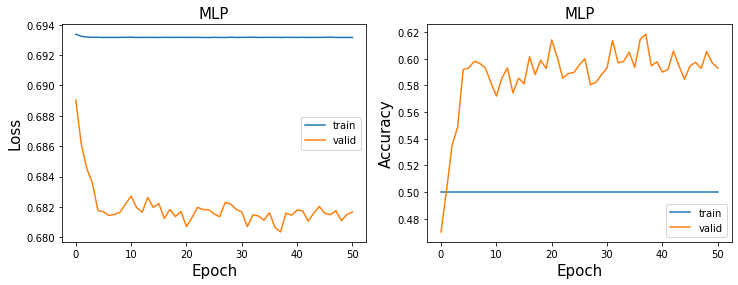

In [14]:

for d in range(0,len(dropout_all)):
    dropout = dropout_all[d]
    model = MLP(input_dim=input_dim, embed_dim=embed_dim,drop_prob = dropout).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    (data, labels, _, _, _) = next(iter(train_loader))
    data = data.to(device)
    output = model(data)
    print('dropout: ', dropout)
    output.shape

    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, 
                                      reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, 
                                     reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if epoch == 0:
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_DO{}_EMBED{}_EPOCH{}_MODEL_{}.pt'.format(
                    save_path, model_type, CH, loss_type, reg_type, alpha, dropout, embed_dim, epoch,model_name))

        if val_losses:
            
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_DO{}_EMBED{}_EPOCH{}_MODEL_{}.pt'.format(
                    save_path, model_type, CH, loss_type, reg_type, alpha, dropout, embed_dim, epoch,model_name))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # embed_dim=64

In [15]:
model_MLP = os.listdir(save_path)
results = []
for x in range(0,len(model_MLP)):
    result = model_MLP[x].split('_') 
    channel = [i for i,item in enumerate(np.array(result)) if "CH23" in item]
    if not(channel):
        continue
    else:
        model_dropout = [i for i,item in enumerate(np.array(result)) if "DO" in item]
        if not(model_dropout):
            continue
        else:
            dropout = [int(i) for i in result[model_dropout[0]] if i.isdigit()]
            if len(dropout) ==2:
                dropout = dropout[1]/10
            else:
                dropout = dropout[0]
            epoch_name = [i for i,item in enumerate(np.array(result)) if "EPOCH" in item]
            res = [int(i) for i in result[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            results.append([dropout, epoch_result])

results = pd.DataFrame(np.array(results), columns=['dropout', 'epoch'])
best_results = results.groupby('dropout').max('epoch')
print(best_results)

         epoch
dropout       
0.0        3.0
0.1        2.0
0.3        2.0
0.5        1.0
0.7        4.0
0.9        1.0
1.0       37.0


In [16]:
for i,(index,row) in enumerate(best_results.iterrows()):
    model = MLP().to(device)
    path = save_path
    if index == 1.0:
        index = 1
    DO = index
    best_epoch = int(row)
    ## Load best model
    model = MLP(input_dim=input_dim, embed_dim=embed_dim).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_DO{}_EMBED{}_EPOCH{}_MODEL_{}.pt'.format(
    save_path, model_type, CH, loss_type, reg_type, alpha, DO, embed_dim, best_epoch,model_name)))
    print('{}/{}_CH{}_LOSS{}_REG{}{}_DO{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha,DO, best_epoch))
    
    # Print Shape
    w1 = model.linear1.weight.view(256,10,100)
    w2 = model.linear2.weight
    print(w1.shape, w2.shape)
    w1 = w1.detach().cpu().numpy()
    w2 = w2.detach().cpu().numpy()
    w1[0].shape
    type(w1)
    
    # Print one feature
    print('One feature')
    plt.yticks(ticks=[0, 20, 40, 60, 80, 99], labels=[round(np.logspace(0, 2.45, 100)[i]) for i in [0, 20, 40, 60, 80, 99]])
    plt.xticks(ticks=[0, 9], labels=[1, 10])
    plt.imshow(w1[1].transpose(),origin='lower')
    # plt.clim(-1.5, 1.5)
    plt.colorbar()
    plt.show()
    
    # All features
    timewindow = 10
    plt.figure(figsize=(20,20))
    ylabels_list = [0,32,64,96,128,160,192,224,256] 
    for i in range(256):
        weights_sub = w1[i]
        plt.subplot(8,32,i+1)
        if i in ylabels_list:
            plt.yticks(ticks=[0, 20, 40, 60, 80, 99], labels=[round(np.logspace(0, 2.45, 100)[i]) for i in [0, 20, 40, 60, 80, 99]])
            plt.xticks(ticks=[0, timewindow-1], labels=[1, timewindow])
        else:
            plt.axis('off')
    #     plt.imshow(weights_sub)
        plt.imshow(w1[i].transpose(),origin='lower')
        plt.title(str(i+1))
    plt.show()
    
    
    ## Calculate accuracy and test loss
    test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_0 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
    
    ## Confusion matrix
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

    cm_test = confusion_matrix(labels_test, predictions_test)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_test.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
    ax.set_title('Test Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Predict vs truth
    val_loss, val_acc, val_preds, val_preds_probs, val_labels, val_dates, val_recs, val_times, cases_wrong_0 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('val loss:{}, val accuracy:{}, val percentage postive:{}'.format(val_loss, val_acc, np.mean(np.concatenate(val_labels))))
    plot_pred_vs_true(val_preds, val_labels, val_dates, val_recs, val_times, date_1='180409')

FileNotFoundError: [Errno 2] No such file or directory: '/home/bijanadmin/Desktop/Goose_and_Jester_data/data_Jester_all_10s_2/Jester_ANN_models/MLP_CH23_LOSSbce_REGnone0_DO0.0_EMBED256_EPOCH3_MODEL_MLP_all_ch_Drop_03.pt'

In [ ]:
for i,(index,row) in enumerate(best_results.iterrows()):
    model = MLP().to(device)
    path = save_path
    if index == 1.0:
        index = 1
    DO = index
    best_epoch = int(row)
    ## Load best model
    model = MLP(input_dim=input_dim, embed_dim=embed_dim).to(device)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_DO{}_EMBED{}_EPOCH{}_MODEL_{}.pt'.format(
    save_path, model_type, CH, loss_type, reg_type, alpha, DO, embed_dim, best_epoch,model_name)))
    print('{}/{}_CH{}_LOSS{}_REG{}{}_DO{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha,DO, best_epoch))
    ## Predict vs truth
    val_loss, val_acc, val_preds, val_preds_probs, val_labels, val_dates, val_recs, val_times, cases_wrong_0 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('val loss:{}, val accuracy:{}, val percentage postive:{}'.format(val_loss, val_acc, np.mean(np.concatenate(val_labels))))
    plot_pred_vs_true(val_preds, val_labels, val_dates, val_recs, val_times, date_1='180409')